# Project: Investigate a Dataset - [No-show appointments]

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

-‘ScheduledDay’ tells us on what day the patient set up their appointment.
-‘Neighborhood’ indicates the location of the hospital.
-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
-'No-show' indicates whether or not the patients showed up for their appointment. 
        
-Under 'No-show', ‘No’ indicates that patient showed up to their appointment, and ‘Yes’ indicates that they did not show up.

-Under 'Scholarship' and other characteristics, '0' indicates that it is true for the patients and '1' indicates that it is false.

This analysis aims to answer two research questions:

### Question 1: Important factors to consider inorder to predict if patients will show up for their scheduled appointment.

### Question 2: Influence of diseases and disability on enrollment for welfare program (Scholarship)

In [1]:
#Importing necessary programs I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Loading data and print out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The cell below is necessary to check for duplicated data.

In [4]:
sum(df.duplicated()) #no duplication found in the data set

0

This cell is necessary to know the number of rolls and columns in the data set.

In [5]:
df.shape #the data set has 110527 rows and 14 columns

(110527, 14)

The two cells below are necessary to investigate and confirm if null values exist in the data set.

In [6]:
df.info() #issue identified: ScheduledDay and AppointmentDay appear as strings, not datetimes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.isnull().sum() #the data set has no null value

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


When comparing, visualizing and interpreting my result (below), i noticed some patients had ages zero (0) which should not be. These datasets with ages zero are useless and therefore needs to be removed. (I had to come back to do this) 

In [9]:
df_agez = df[df['Age'] == 0]
df_agez.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


In [10]:
df_agez.info() #We have 3539 patients with ages zero

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 59 to 110507
Data columns (total 14 columns):
PatientId         3539 non-null float64
AppointmentID     3539 non-null int64
Gender            3539 non-null object
ScheduledDay      3539 non-null object
AppointmentDay    3539 non-null object
Age               3539 non-null int64
Neighbourhood     3539 non-null object
Scholarship       3539 non-null int64
Hipertension      3539 non-null int64
Diabetes          3539 non-null int64
Alcoholism        3539 non-null int64
Handcap           3539 non-null int64
SMS_received      3539 non-null int64
No-show           3539 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 414.7+ KB


ScheduledDay and AppointmentDay consist of datas that are dates. But during investigation, the data types appeared as strings. So i will be converting the data types to datetimes so it is easier to work with.

In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

Having run the datetime conversion code, I will now go ahead to confirm if the change was applied 

In [12]:
df.info() #Now the ScheduledDay and ApoointmentDay datas appear as datetimes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Now let us drop the patients with ages zero

In [13]:
for y in df.index:
    if df.loc[y, 'Age'] == 0:
        df.drop(y, inplace = True)

Now let's confirm to see if patients with ages zero still exist in our dataset

In [14]:
df_agezn = df[df['Age'] == 0] #Perfect!!! It is empty
df_agezn.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [15]:
df_agezn.info() #To reconfirm, you can see number of patients with ages zero is actually zero

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
PatientId         0 non-null float64
AppointmentID     0 non-null int64
Gender            0 non-null object
ScheduledDay      0 non-null datetime64[ns, UTC]
AppointmentDay    0 non-null datetime64[ns, UTC]
Age               0 non-null int64
Neighbourhood     0 non-null object
Scholarship       0 non-null int64
Hipertension      0 non-null int64
Diabetes          0 non-null int64
Alcoholism        0 non-null int64
Handcap           0 non-null int64
SMS_received      0 non-null int64
No-show           0 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 0.0+ bytes


Here we properly rename the columns to correct errors and ensure uniformity.

In [16]:
df.rename(columns={'ScheduledDay':'Scheduled_day', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'AppointmentDay':'Appointment_day', 'AppointmentID':'Appointment_id', 'PatientId':'Patient_id', 'No-show':'No_show'}, inplace=True)

### Research Question 1 ( Important factors to consider inorder to predict if patients will show up for their scheduled appointment!)

Question: Important factors to consider inorder to predict if patients will show up for their scheduled appointment?

First let us separate those that showed up for their appointment from those that did not.

In [17]:
df_s = df[df['No_show'] == 'No'] #Those that showed up for their appointment

In [18]:
df_ns = df[df['No_show'] == 'Yes'] #Those that did not show up for their appointment

Now let us see how many people showed up for their appointment and how many did not.

In [19]:
df_s.shape #85308 people showed up for their appointment

(85308, 14)

In [20]:
df_ns.shape #21680 people did not show up for their appointment

(21680, 14)

Let us see how those that showed up and those that did not compare on a histogram.

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


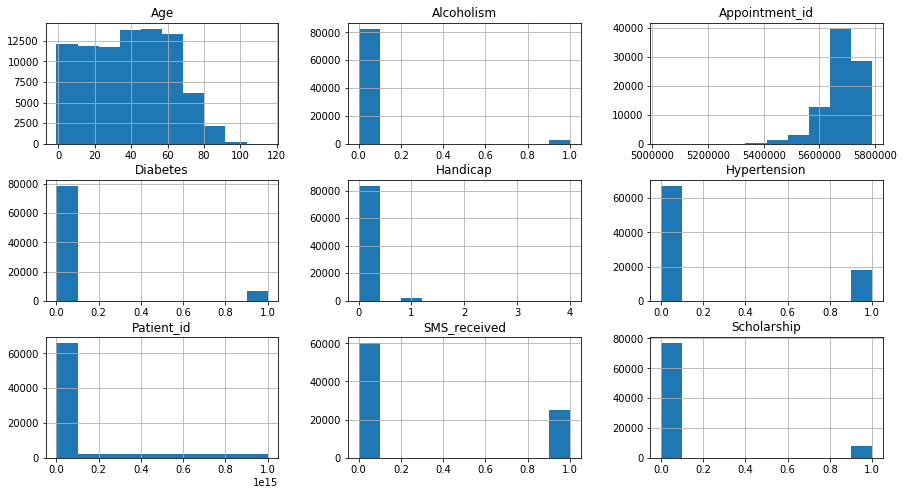

In [21]:
df_s.hist(figsize= (15,8)); #Those that showed up
df_s.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


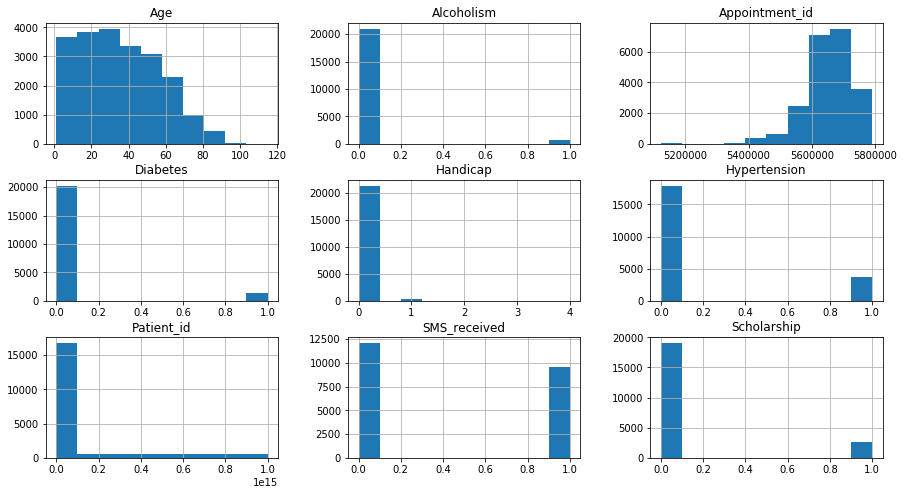

In [22]:
df_ns.hist(figsize= (15,8)); #Those that did not show up
df_ns.head()

Here we append _ns to every column heading of the data of those that did not show up. This is to distinguish the
columns from that of those that showed up.

In [23]:
df_ns.rename(columns = lambda x: x + '_ns', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [24]:
df_ns.head()

,Patient_id_ns,Appointment_id_ns,Gender_ns,Scheduled_day_ns,Appointment_day_ns,Age_ns,Neighbourhood_ns,Scholarship_ns,Hypertension_ns,Diabetes_ns,Alcoholism_ns,Handicap_ns,SMS_received_ns,No_show_ns
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


Below, we try to find out the influence of given parameters on either showing up for appointment or not. Note that "No"
represents those that showed up and "Yes" represents those that did not show up. Likewise, "0" represents a positive
outcome and "1", a negative outcome. Example: "0" represents those with Scholarship and "1", those without it.

Patient_id  Appointment_id  Gender  Scheduled_day  \
Scholarship No_show                                                      
0           No            77070           77070   77070          77070   
            Yes           19109           19109   19109          19109   
1           No             8238            8238    8238           8238   
            Yes            2571            2571    2571           2571   

                     Appointment_day    Age  Neighbourhood  Hypertension  \
Scholarship No_show                                                        
0           No                 77070  77070          77070         77070   
            Yes                19109  19109          19109         19109   
1           No                  8238   8238           8238          8238   
            Yes                 2571   2571           2571          2571   

                     Diabetes  Alcoholism  Handicap  SMS_received  
Scholarship No_show                                                
0           No          77070       77070     77070         77070  
            Yes         19109       19109     19109         19109  
1           No           8238        8238      8238          8238  
            Yes          2571        2571      2571          2571

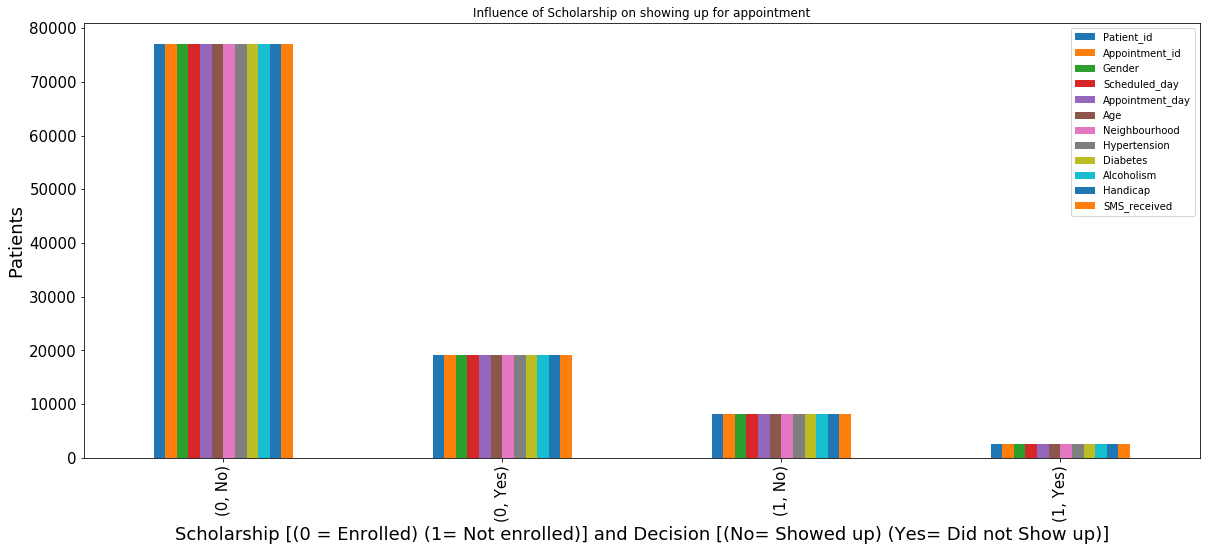

In [64]:
counts = df.groupby(['Scholarship', 'No_show']).count()
counts.plot(kind='bar', title='Influence of Scholarship on showing up for appointment', figsize=(20,8), fontsize=15);
plt.xlabel('Scholarship [(0 = Enrolled) (1= Not enrolled)] and Decision [(No= Showed up) (Yes= Did not Show up)]', fontsize=18)
plt.ylabel('Patients', fontsize=18)

df.groupby(['Scholarship', 'No_show']).count()

The Plot above showed that Scholarship (enrollment into welfare program) had a influence on Patients showing up for appointments. First bar from the left represents those who had scholarships and showed up for appointment. Second bar represents those that had scholarship but did not show up. Third, those that did not have scholarship but showed up, while the forth bar represents those that did not have scholarship and never showed up.

Patient_id  Appointment_id  Gender  Scheduled_day  \
SMS_received No_show                                                      
0            No            60291           60291   60291          60291   
             Yes           12112           12112   12112          12112   
1            No            25017           25017   25017          25017   
             Yes            9568            9568    9568           9568   

                      Appointment_day    Age  Neighbourhood  Scholarship  \
SMS_received No_show                                                       
0            No                 60291  60291          60291        60291   
             Yes                12112  12112          12112        12112   
1            No                 25017  25017          25017        25017   
             Yes                 9568   9568           9568         9568   

                      Hypertension  Diabetes  Alcoholism  Handicap  
SMS_received No_show                                                
0            No              60291     60291       60291     60291  
             Yes             12112     12112       12112     12112  
1            No              25017     25017       25017     25017  
             Yes              9568      9568        9568      9568

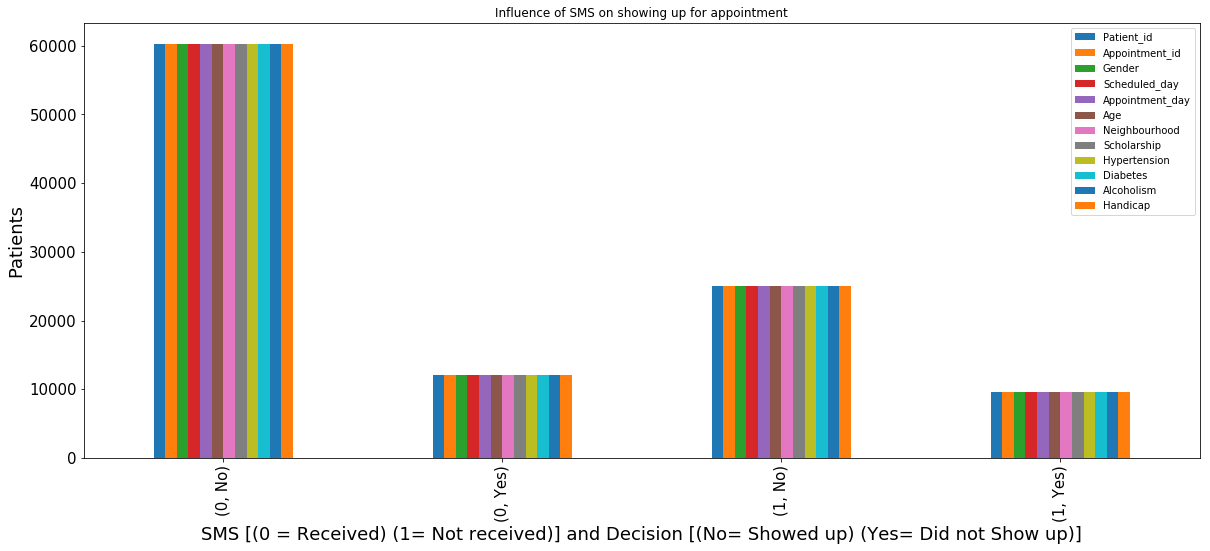

In [65]:
counts = df.groupby(['SMS_received', 'No_show']).count()
counts.plot(kind='bar', title='Influence of SMS on showing up for appointment', figsize=(20,8), fontsize=15);
plt.xlabel('SMS [(0 = Received) (1= Not received)] and Decision [(No= Showed up) (Yes= Did not Show up)]', fontsize=18)
plt.ylabel('Patients', fontsize=18)

df.groupby(['SMS_received','No_show']).count()

Like for the Scholarship, the plot above suggests that SMS played a postive role in influencing patients to show up for appointments.

Patient_id  Appointment_id  Gender  \
Hypertension Diabetes Alcoholism No_show                                       
0            0        0          No            64574           64574   64574   
                                 Yes           17199           17199   17199   
                      1          No             1537            1537    1537   
                                 Yes             420             420     420   
             1        0          No             1105            1105    1105   
                                 Yes             276             276     276   
                      1          No               63              63      63   
                                 Yes              13              13      13   
1            0        0          No            11811           11811   11811   
                                 Yes            2433            2433    2433   
                      1          No              873             873     873   
                                 Yes             198             198     198   
             1        0          No             5135            5135    5135   
                                 Yes            1095            1095    1095   
                      1          No              210             210     210   
                                 Yes              46              46      46   

                                          Scheduled_day  Appointment_day  \
Hypertension Diabetes Alcoholism No_show                                   
0            0        0          No               64574            64574   
                                 Yes              17199            17199   
                      1          No                1537             1537   
                                 Yes                420              420   
             1        0          No                1105             1105   
                                 Yes                276              276   
                      1          No                  63               63   
                                 Yes                 13               13   
1            0        0          No               11811            11811   
                                 Yes               2433             2433   
                      1          No                 873              873   
                                 Yes                198              198   
             1        0          No                5135             5135   
                                 Yes               1095             1095   
                      1          No                 210              210   
                                 Yes                 46               46   

                                            Age  Neighbourhood  Scholarship  \
Hypertension Diabetes Alcoholism No_show                                      
0            0        0          No       64574          64574        64574   
                                 Yes      17199          17199        17199   
                      1          No        1537           1537         1537   
                                 Yes        420            420          420   
             1        0          No        1105           1105         1105   
                                 Yes        276            276          276   
                      1          No          63             63           63   
                                 Yes         13             13           13   
1            0        0          No       11811          11811        11811   
                                 Yes       2433           2433         2433   
                      1          No         873            873          873   
                                 Yes        198            198          198   
             1        0          No        5135           5135         5135   
                                 Yes       1095

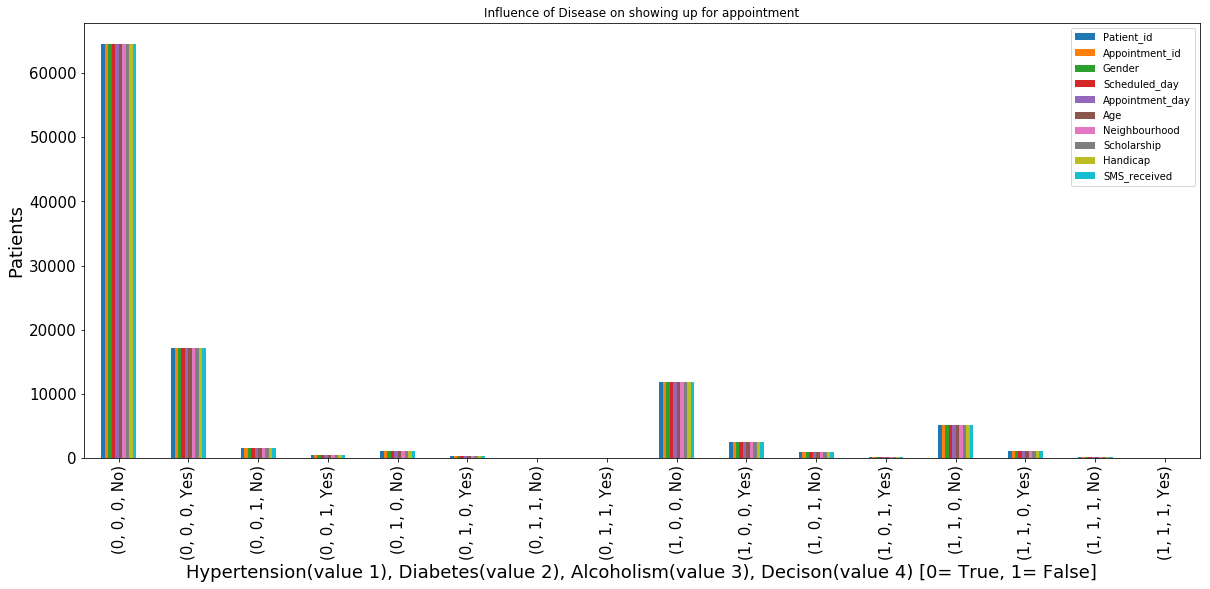

In [68]:
counts = df.groupby(['Hypertension', 'Diabetes', 'Alcoholism', 'No_show']).count()
counts.plot(kind='bar', title='Influence of Disease on showing up for appointment', figsize=(20,8), fontsize=15);
plt.xlabel('Hypertension(value 1), Diabetes(value 2), Alcoholism(value 3), Decison(value 4) [0= True, 1= False]', fontsize=18)

plt.ylabel('Patients', fontsize=18)

df.groupby(['Hypertension', 'Diabetes', 'Alcoholism', 'No_show']).count()

The plot above established that more patients with one or mulitple types of disease showed up for their appointment. Diagnosis was therefore an important factor that influenced patients showing up for appointment.

### Research Question 2  (Influence of disease and disability on enrollment for welfare program (Scholarship)!)

Let's see the number of patients with a disease or disability in relation to welfare enrollment 

,Scholarship
Hypertension,
0,0.104770
1,0.086418


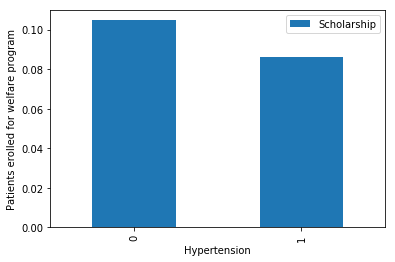

In [71]:
df.groupby(['Hypertension'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program');

df.groupby(['Hypertension'])[['Scholarship']].mean() #Patients with Hypertention who were on Scholarship

The plot above implies that more patients with Hypertension were enrolled in the welfare program.

,Scholarship
Diabetes,
0,0.103387
1,0.071635


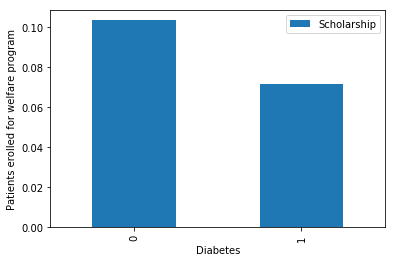

In [72]:
df.groupby(['Diabetes'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df.groupby(['Diabetes'])[['Scholarship']].mean() #Patients with Diabetes who were on Scholarship

The plot above implies that more patients with Diabetes were also enrolled in the welfare program as opposed to the non diabetic patients.

,Scholarship
Alcoholism,
0,0.099211
1,0.157143


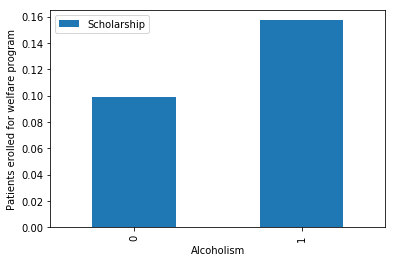

In [73]:
df.groupby(['Alcoholism'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df.groupby(['Alcoholism'])[['Scholarship']].mean() #Patients with Alcoholism who were on Scholarship

The plot above shows that more of non alcoholic patients were enrolled in the welfare program as opposed to alcoholic patients.

Scholarship
Hypertension Diabetes Alcoholism             
0            0        0                 81773
                      1                  1957
             1        0                  1381
                      1                    76
1            0        0                 14244
                      1                  1071
             1        0                  6230
                      1                   256

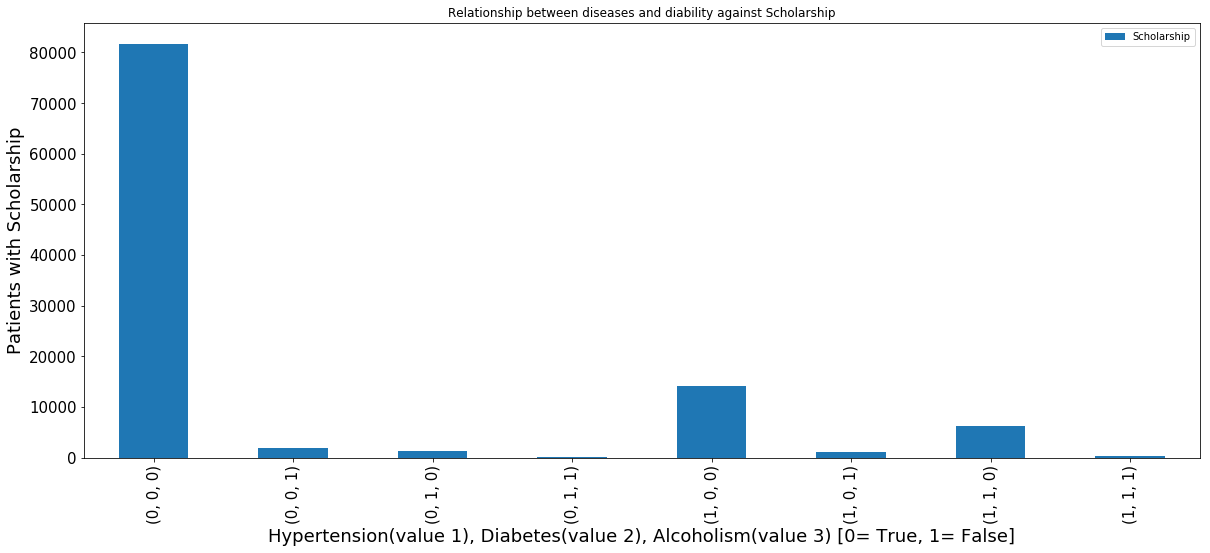

In [75]:
counts = df.groupby(['Hypertension', 'Diabetes', 'Alcoholism'])[['Scholarship']].count()
counts.plot(kind='bar', title='Relationship between diseases and diability against Scholarship', figsize=(20,8), fontsize=15);
plt.xlabel('Hypertension(value 1), Diabetes(value 2), Alcoholism(value 3) [0= True, 1= False]', fontsize=18)
plt.ylabel('Patients with Scholarship', fontsize=18)

df.groupby(['Hypertension', 'Diabetes', 'Alcoholism'])[['Scholarship']].count()

The plot above showed that majority of patients enrolled for the welfare program had one or two diseases.

The code below tries to find out the number of patients with diseases that had scholarship among the population that showed up for appointment.

Recall that we earlier categorised patients that showed up under "df_s" and those that did not show up as "df_ns". Now we will compare for each of the groups. First we will generalize for all diseases, then we compare for each disease.

Scholarship
Hypertension Diabetes Alcoholism             
0            0        0                 64574
                      1                  1537
             1        0                  1105
                      1                    63
1            0        0                 11811
                      1                   873
             1        0                  5135
                      1                   210

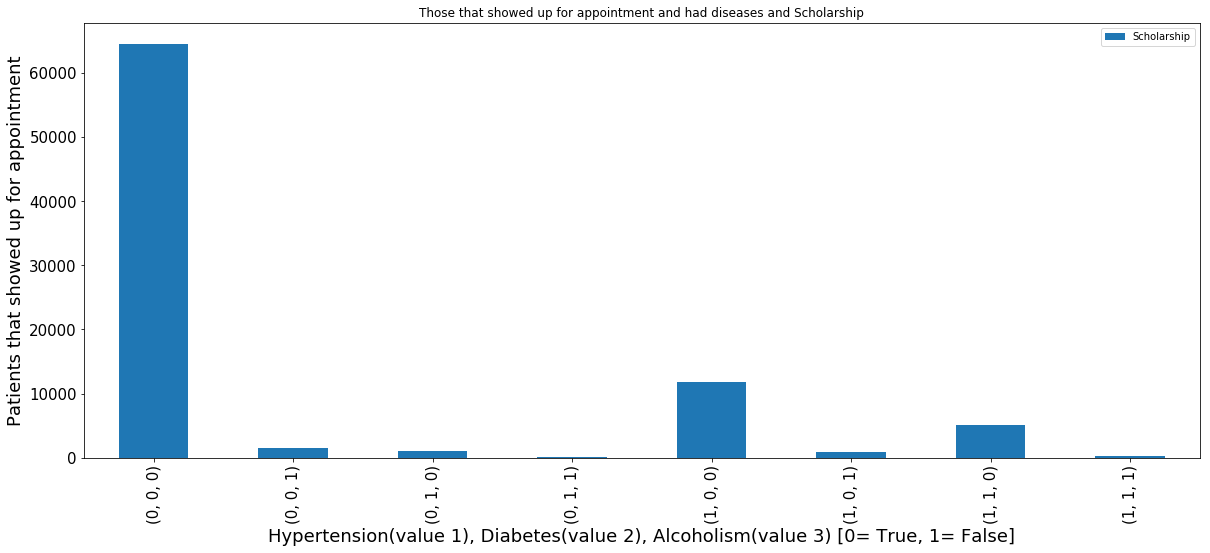

In [91]:
Dis = df_s.groupby(['Hypertension', 'Diabetes', 'Alcoholism'])[['Scholarship']].count() #For patients that showed up
Dis.plot(kind='bar', title='Those that showed up for appointment and had diseases and Scholarship', figsize=(20,8), fontsize=15);
plt.xlabel('Hypertension(value 1), Diabetes(value 2), Alcoholism(value 3) [0= True, 1= False]', fontsize=18)
plt.ylabel('Patients that showed up for appointment', fontsize=18)

df_s.groupby(['Hypertension', 'Diabetes', 'Alcoholism'])[['Scholarship']].count()

The plot above established that most patients who showed up for appointment had diseases or disability and were enrolled in the welfare program.

,Scholarship
Hypertension,
0,0.104770
1,0.086418


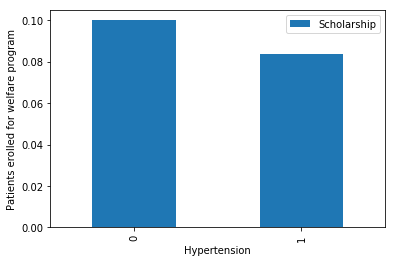

In [79]:
df_s.groupby(['Hypertension'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df.groupby(['Hypertension'])[['Scholarship']].mean()

More of the hypertensive patients that showed up for their appointment were enrolled in the welfare program.

,Scholarship
Diabetes,
0,0.103387
1,0.071635


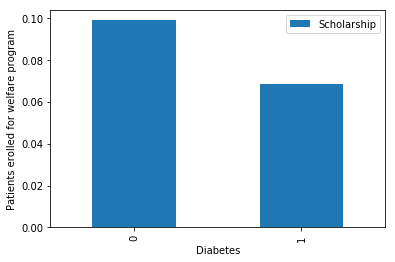

In [80]:
df_s.groupby(['Diabetes'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df.groupby(['Diabetes'])[['Scholarship']].mean()

More of the diabetic patients that showed up for their appointment were enrolled in the welfare program.

,Scholarship
Alcoholism,
0,0.099211
1,0.157143


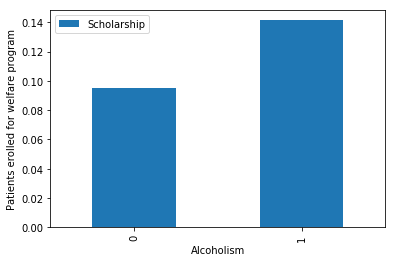

In [81]:
df_s.groupby(['Alcoholism'])[['Scholarship']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df.groupby(['Alcoholism'])[['Scholarship']].mean()

The plot above established that more of the sponsored patients that showed up for their appointment were non-Alcoholic patients. This implies that less Alcoholic patients were not sponsored.

The code below tries to find out the number of patients with diseases that had scholarship among the population that did not show up for appointment.

Scholarship_ns
Hypertension_ns Diabetes_ns Alcoholism_ns                
0               0           0                       17199
                            1                         420
                1           0                         276
                            1                          13
1               0           0                        2433
                            1                         198
                1           0                        1095
                            1                          46

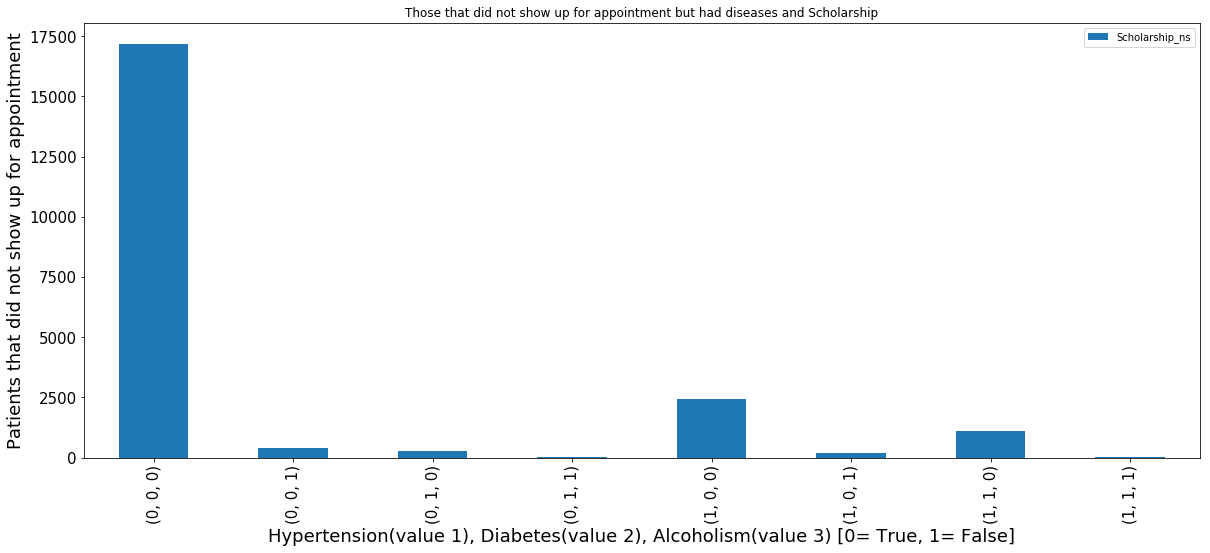

In [90]:
Dis_ns = df_ns.groupby(['Hypertension_ns', 'Diabetes_ns', 'Alcoholism_ns'])[['Scholarship_ns']].count()
Dis_ns.plot(kind='bar', title='Those that did not show up for appointment but had diseases and Scholarship', figsize=(20,8), fontsize=15);
plt.xlabel('Hypertension(value 1), Diabetes(value 2), Alcoholism(value 3) [0= True, 1= False]', fontsize=18)
plt.ylabel('Patients that did not show up for appointment', fontsize=18)

df_ns.groupby(['Hypertension_ns', 'Diabetes_ns', 'Alcoholism_ns'])[['Scholarship_ns']].count()

The plot above established that most patients who did not show up for appointment also had diseases and were equally enrolled in the welfare program.

Now let us see how individual diseases compare in relation to scholasrship.

,Scholarship_ns
Hypertension_ns,
0,0.122794
1,0.098621


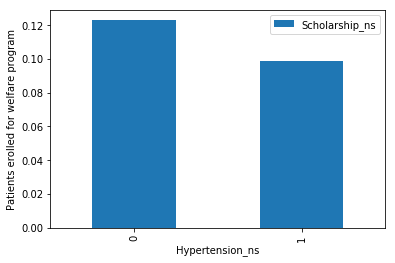

In [86]:
df_ns.groupby(['Hypertension_ns'])[['Scholarship_ns']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df_ns.groupby(['Hypertension_ns'])[['Scholarship_ns']].mean()

The plot above established that more of hypertensive patients that refused to show up for appointment were enrolled in the welfare program. 

,Scholarship_ns
Diabetes_ns,
0,0.120889
1,0.086014


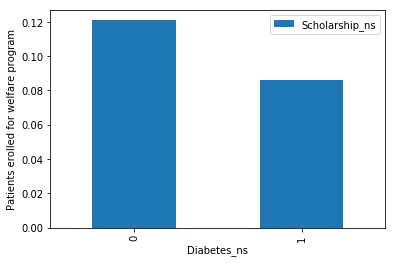

In [87]:
df_ns.groupby(['Diabetes_ns'])[['Scholarship_ns']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df_ns.groupby(['Diabetes_ns'])[['Scholarship_ns']].mean()

The plot above established that more of diabetic patients that refused to show up for appointment were enrolled in the welfare program. 

,Scholarship_ns
Alcoholism_ns,
0,0.115317
1,0.220089


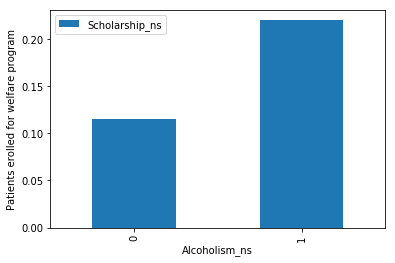

In [85]:
df_ns.groupby(['Alcoholism_ns'])[['Scholarship_ns']].mean().plot(kind='bar').set_ylabel('Patients erolled for welfare program')

df_ns.groupby(['Alcoholism_ns'])[['Scholarship_ns']].mean()

The plot above established that more of alcoholic patients that refused to show up for appointment were not enrolled in the welfare program. 

### Summary, Conclusion and Limitation

The aim of this analysis was to answer two important research questions.

Question 1: Important factors to consider inorder to predict if patients will show up for their scheduled appointment.

Question 2: Influence of diseases and disability on enrollment for welfare program (Scholarship)

The data was found to be devoid of duplication and also had no null value. It was however found that some of the patients had ages zero (0), which could not be true. So such datas of patients with ages zero was dropped.

The dataset was categorised based on those that showed up for appointment and those that did not show up, and necessary correlations were made and visualized.

Findings revealed that enrollment for welfare program was an important factor that influenced patients showing up for appointment. This may be due to the benefit of reduction in the cost of care from the patient's end. Also, patients with one or two disease/disability and those that received SMS showed up more for appointment.
 

Equally, analysis result established that majority of patients enrolled for the welfare program had one or two diseases and disability. Likewise, majority of those enrolled for the welfare program were non-alcoholic patients.


### Limitation

There was no data on the proximity of patients to the healthcare centers, aswell as their religious beliefs, which I believe are important factors to consider in finding out why patients show up or do not show up for appointments.

More research can therefore be carried out to get data on patients proximities to healthcare centers, religious beliefs as well as terrain to inform future results and decisions.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0